In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error

# Chargement des données

In [2]:
data_movies= pd.read_csv("data/movies.csv")

In [ ]:
data_ratings= pd.read_csv("data/ratings.csv")

MOVIES DATASET




In [4]:
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
data_movies.shape

(62423, 3)

#   Diagramme en bâton illustrant le nombre de films que l'on a par genre

In [6]:
data_movies['genres'].value_counts()

,count
genres,
Drama,9056
Comedy,5674
(no genres listed),5062
Documentary,4731
Comedy|Drama,2386
...,...
Action|Adventure|Crime|Fantasy,1
Drama|Film-Noir|Musical|Thriller,1
Action|Drama|Horror|Mystery,1


In [7]:
# Extraire tous les genres uniques
all_genres = set()
for genres_str in data_movies['genres']:
    all_genres.update(genres_str.split('|'))

# Trier les genres par ordre alphabètique
all_genres = sorted(all_genres)

# Créer un dataframe
genres_count = pd.DataFrame({'Genres': all_genres, 'Count': 0 }, columns = ['Genres', 'Count'])

# Remplir la matrice
for idx, row in data_movies.iterrows():
    movie_genres = row['genres'].split('|')
    for genre in movie_genres:
        genres_count.loc[genres_count['Genres'] == genre, 'Count'] += 1

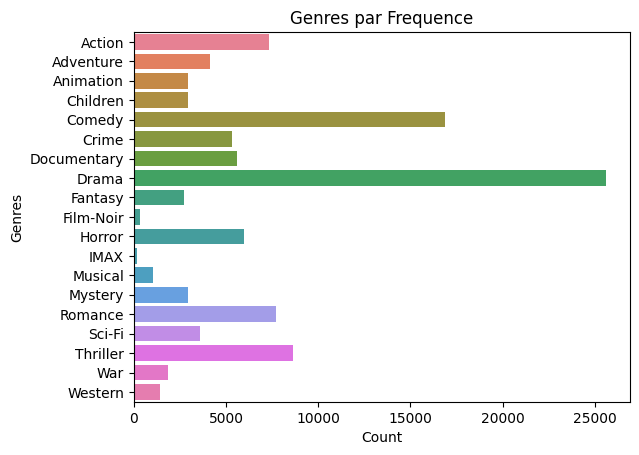

In [8]:
genres_count=genres_count.drop(genres_count[genres_count.Genres=='(no genres listed)'].index)
# Plotting avec sns.barplot
sns.barplot(data=genres_count, x='Count', y='Genres', hue="Genres")
plt.title("Genres par Frequence")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

# Nettoyage : Extraction des jeux de données "movies_1.csv" et "ratings_1.csv" en ignorant les films avec un genre non listé

In [9]:
#suppression de (no genres listed)
data_movies_1 =data_movies.drop(data_movies[data_movies.genres=='(no genres listed)'].index)

In [ ]:
#Nouveau Dataframe sans les films avec genre non listés
data_movies_1.to_csv('movies_1.csv',index=False)

RATINGS DATASET


In [11]:
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [12]:
data_ratings.shape

(25000095, 4)

In [15]:
users_participation_counts = data_ratings.userId.value_counts()
# Définir le seuil
seuil = 5000

# Filtrer les utilisateurs qui ont évalué au moins 1000 films
active_users = users_participation_counts[users_participation_counts >= seuil].index

In [16]:
# Filtrer les données d'origine
filtered_ratings = data_ratings[data_ratings['userId'].isin(active_users)]
# Vérifier le résultat
print(f"Nombre de lignes après filtrage : {filtered_ratings.shape[0]}")

Nombre de lignes après filtrage : 138974


In [17]:
filtered_ratings

,userId,movieId,rating,timestamp
3037025,20055,1,5.0,1160463838
3037026,20055,2,3.0,1160533952
3037027,20055,3,2.5,1163336461
3037028,20055,5,1.5,1163336723
3037029,20055,6,4.0,1160532816
...,...,...,...,...
21136067,137293,202253,3.0,1561243131
21136068,137293,202561,3.0,1561085428
21136069,137293,202575,3.5,1563311305
21136070,137293,203693,3.0,1563759849


In [18]:
#Dataframe de movies avec les genres non listes
data_movies_nogenres=data_movies.where(data_movies.genres=='(no genres listed)').dropna()
data_movies_nogenres

,movieId,title,genres
15881,83773.0,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768.0,Glitterbug (1994),(no genres listed)
16351,86493.0,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061.0,Trails (Veredas) (1978),(no genres listed)
17404,91246.0,Milky Way (Tejút) (2007),(no genres listed)
...,...,...,...
62400,209101.0,Hua yang de nian hua (2001),(no genres listed)
62401,209103.0,Tsar Ivan the Terrible (1991),(no genres listed)
62407,209133.0,The Riot and the Dance (2018),(no genres listed)
62415,209151.0,Mao Zedong 1949 (2019),(no genres listed)


In [19]:
#Verifier les type de donnees que nous avons
data_movies_nogenres.dtypes

,0
movieId,float64
title,object
genres,object


In [20]:
#Changer le type de donnees de movieid
data_movies_nogenres.movieId = data_movies_nogenres.movieId.astype(int)

In [21]:
#Merge data_movies_no_genres avec data_ratings pour avoir le nouveau data_ratings avec les films sans genre listes
new_data_ratings = filtered_ratings.merge(data_movies_nogenres, on='movieId', how='left')

# Display the resulting DataFrame
new_data_ratings

,userId,movieId,rating,timestamp,title,genres
0,20055,1,5.0,1160463838,NaN,NaN
1,20055,2,3.0,1160533952,NaN,NaN
2,20055,3,2.5,1163336461,NaN,NaN
3,20055,5,1.5,1163336723,NaN,NaN
4,20055,6,4.0,1160532816,NaN,NaN
...,...,...,...,...,...,...
138969,137293,202253,3.0,1561243131,NaN,NaN
138970,137293,202561,3.0,1561085428,NaN,NaN
138971,137293,202575,3.5,1563311305,NaN,NaN
138972,137293,203693,3.0,1563759849,NaN,NaN


In [22]:
#suppression  des lignes (no genres listed) dans ratings
data_ratings_1 =new_data_ratings.drop(new_data_ratings[new_data_ratings.genres=='(no genres listed)'].index)
#Suppression des colonnes 'title' et 'genres'
data_ratings_1=data_ratings_1.drop(columns=['title','genres'],axis=1)

In [23]:
#Verifier les types du dataframe ratings
data_ratings_1.dtypes

,0
userId,int64
movieId,int64
rating,float64
timestamp,int64


In [24]:
#shape
data_ratings_1.shape

(136267, 4)

In [25]:
#Mapping des ratings
ratings_map= {5.5:5, 4.5: 4, 3.5:3, 2.5:2, 1.5:1, 0.5:1}

# Appliquer le mapping avec iterrows()
for index, row in data_ratings_1.iterrows():
  if row['rating'] in ratings_map:
    data_ratings_1.loc[index, 'rating'] = ratings_map[row['rating']]


In [26]:
#Changer le type de donnees de ratings
data_ratings_1.rating = data_ratings_1.rating.astype(int)

In [27]:
data_ratings_1

,userId,movieId,rating,timestamp
0,20055,1,5,1160463838
1,20055,2,3,1160533952
2,20055,3,2,1163336461
3,20055,5,1,1163336723
4,20055,6,4,1160532816
...,...,...,...,...
138969,137293,202253,3,1561243131
138970,137293,202561,3,1561085428
138971,137293,202575,3,1563311305
138972,137293,203693,3,1563759849


In [28]:
#Generer le fichier ratings1
data_ratings_1.to_csv("ratings_1.csv",index=False)

# Construction d'une base de données de films en contenu

In [29]:
# Extraire tous les genres uniques
all_genres = set()
for genres_str in data_movies_1['genres']:
    all_genres.update(genres_str.split('|'))

# Trier les genres par ordre alphabètique
all_genres = sorted(all_genres)

# Créer la matrice de contenu binaire
content_matrix = pd.DataFrame(0, index=data_movies_1['movieId'], columns=all_genres)

# Remplir la matrice
for idx, row in data_movies_1.iterrows():
    movie_genres = row['genres'].split('|')
    content_matrix.loc[row['movieId'], movie_genres] = 1


In [30]:
content_matrix

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209155,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
209157,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
209159,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Construire la matrice de profil des utilisateurs P

In [31]:
data_ratings_1['userId']

,userId
0,20055
1,20055
2,20055
3,20055
4,20055
...,...
138969,137293
138970,137293
138971,137293
138972,137293


In [32]:
user_profile = {}

for user_id, user_movies in data_ratings_1.groupby('userId'):
    profile_vector = (user_movies['rating'].values[:, None] *
                      content_matrix.loc[user_movies['movieId']].values).sum(axis=0)
    norm = np.linalg.norm(profile_vector)
    user_profile[user_id] = profile_vector / norm if norm > 0 else profile_vector

# Convertir le dictionnaire en DataFrame
user_profiles_df = pd.DataFrame.from_dict(user_profile, orient='index', columns=content_matrix.columns)
print(user_profiles_df)

          Action  Adventure  Animation  Children    Comedy     Crime  \
20055   0.187960   0.157359   0.050531  0.077208  0.434669  0.168091   
29803   0.305101   0.177734   0.043236  0.069088  0.438262  0.195452   
30879   0.201627   0.114488   0.007851  0.019671  0.641980  0.228718   
33844   0.183993   0.099806   0.015289  0.028857  0.359515  0.213644   
49403   0.308161   0.208424   0.117894  0.128763  0.567477  0.189116   
57548   0.334139   0.231327   0.105233  0.099459  0.453528  0.180852   
61010   0.241714   0.154041   0.045151  0.070084  0.472549  0.204269   
72315   0.145207   0.095821   0.066485  0.047843  0.371490  0.140970   
75309   0.254568   0.110906   0.028158  0.047696  0.384725  0.169233   
78849   0.262970   0.142081   0.003870  0.028103  0.453240  0.255875   
80974   0.178206   0.140623   0.030893  0.061508  0.466839  0.182016   
92046   0.156675   0.139096   0.054450  0.072151  0.491952  0.175356   
93855   0.275066   0.176433   0.065559  0.085215  0.539656  0.19

# Préparation des données pour l'évaluation (et comparaison) des systèmes de recommandation développés

Nous avons procédé par une division simple

In [33]:
# Mélanger les données
data_ratings_shuffled = data_ratings_1.sample(frac=1, random_state=42).reset_index(drop=True)

# Diviser les données (80 % pour les données d'entraînement et 20% pour les données de test)
split_index = int(len(data_ratings_shuffled) * 0.8)
ratings_apprentissage = data_ratings_shuffled[:split_index]
ratings_evaluation = data_ratings_shuffled[split_index:]

# Créer les fichiers ratings_apprentissage.csv et ratings_evaluation.csv qui contiennent respectivement les données d'entraînement
# et les données d'évaluation
ratings_apprentissage.to_csv("ratings_apprentissage.csv", index=False)
ratings_evaluation.to_csv("ratings_evaluation.csv", index=False)

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'apprentissage : {len(ratings_apprentissage)}")
print(f"Taille de l'ensemble d'évaluation : {len(ratings_evaluation)}")

Taille de l'ensemble d'apprentissage : 109013
Taille de l'ensemble d'évaluation : 27254


# Question 6

In [34]:
# Initialiser les variables pour les évaluations estimées et réelles
estimated_ratings = []
true_ratings = []
user_similarity = {}

# Charger les données d'apprentissage et d'évaluation à partir des fichiers créés
train_set = pd.read_csv("ratings_apprentissage.csv")
test_set = pd.read_csv("ratings_evaluation.csv")

# Calculer la matrice de similarité entre les utilisateurs
for user_u in train_set['userId'].unique():
    for user_v in train_set['userId'].unique():
        if user_u != user_v:
            # Films évalués par user_u et user_v
            ratings_u = train_set[train_set['userId'] == user_u]
            ratings_v = train_set[train_set['userId'] == user_v]

            # Identifier les films communs
            common_movies = set(ratings_u['movieId']).intersection(set(ratings_v['movieId']))

            if len(common_movies) > 0:
                # Ratings des films communs pour les deux utilisateurs
                ratings_u_common = ratings_u[ratings_u['movieId'].isin(common_movies)]['rating']
                ratings_v_common = ratings_v[ratings_v['movieId'].isin(common_movies)]['rating']

                # Moyennes des évaluations
                ru = ratings_u_common.mean()
                rv = ratings_v_common.mean()

                # Calcul de la similarité
                numerateur = sum((ratings_u_common - ru) * (ratings_v_common - rv))
                denominateur1 = sum((ratings_u_common - ru)**2)**0.5
                denominateur2 = sum((ratings_v_common - rv)**2)**0.5

                similarity = numerateur / (denominateur1 * denominateur2) if denominateur1 > 0 and denominateur2 > 0 else 0
                user_similarity[(user_u, user_v)] = similarity


In [36]:
# Estimation des scores pour les évaluations dans ratings_test
for _, row in test_set.iterrows():
    user_id = row['userId']
    movie_id = row['movieId']
    true_rating = row['rating']
    true_ratings.append(true_rating)

    # Obtenir les utilisateurs similaires pour user_id
    similar_users = [user_v for user_v in train_set['userId'].unique() if user_v != user_id]

    # Calculer la somme pondérée des évaluations
    weighted_sum = 0
    similarity_sum = 0
    for user_v in similar_users:
        if (user_id, user_v) in user_similarity and (movie_id in train_set[train_set['userId'] == user_v]['movieId'].values):
            similarity = user_similarity[(user_id, user_v)]
            rating_v = train_set[(train_set['userId'] == user_v) & (train_set['movieId'] == movie_id)]['rating'].values[0]

            weighted_sum += similarity * (rating_v - train_set[train_set['userId'] == user_v]['rating'].mean())
            similarity_sum += abs(similarity)

    # Calculer l'évaluation estimée
    if similarity_sum > 0:
        estimated_rating = train_set[train_set['userId'] == user_id]['rating'].mean() + (weighted_sum / similarity_sum)
    else:
        estimated_rating = train_set[train_set['userId'] == user_id]['rating'].mean()  # Si pas de similarité, utiliser la moyenne

    estimated_ratings.append(estimated_rating)

# Calculer le RMSE (Root Mean Square Error)
rmse = np.sqrt(np.mean((np.array(estimated_ratings) - np.array(true_ratings)) ** 2))
print(f"RMSE : {rmse}")

RMSE : 0.8243008575354488


# Question 7

In [37]:
def effectuer_clustering(user_profiles_df):

    # Initialiser best_k à 2, cette valeur sera mise à jour si un autre k est trouvé comme optimal
    best_k = 2

    # Initialiser le score silhouette correspondant au clustering optimal
    best_silhouette = -1

    # Initialisation d'une liste qui contient les scores silhouette pour les différentes valeurs de k
    silhouette_scores = []

    for k in range (2,11):
            # Appliquer k-means clustering
            kmeans = KMeans(n_clusters=k, random_state=42)
            cluster_labels = kmeans.fit_predict(user_profiles_df)

            # Calculer le score de silhouette
            silhouette_avg = silhouette_score(user_profiles_df, cluster_labels)
            silhouette_scores.append((k, silhouette_avg))

            # Chercher le k et le score silhouette correspondant au clustering optimal
            if silhouette_avg > best_silhouette:
                best_k = k
                best_silhouette = silhouette_avg
    return best_k, silhouette_scores

# Appel de la fonction avec la matrice user_profiles_df
best_k, silhouette_scores = effectuer_clustering(user_profiles_df)

print(f"Meilleur nombre de clusters : {best_k}")
print("Scores de silhouette pour chaque k :", silhouette_scores)

Meilleur nombre de clusters : 2
Scores de silhouette pour chaque k : [(2, 0.32103403775401357), (3, 0.3131990902145277), (4, 0.2639469983207576), (5, 0.2474550645013966), (6, 0.2855881223753658), (7, 0.29245073561114243), (8, 0.23363578086579484), (9, 0.16831304349464424), (10, 0.1648440799008041)]


In [38]:
# On roule le KMeans pour le k optimal trouvé
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Ajout d'une colonne "cluster" à la matrice user_profiles_df qui indique le cluster à lequel appartient chaque utilisateur
user_profiles_df["cluster"] = kmeans.fit_predict(user_profiles_df)

In [39]:
user_profiles_df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
20055,0.187960,0.157359,0.050531,0.077208,0.434669,0.168091,0.079783,0.736693,0.087326,0.027964,0.110016,0.015638,0.073651,0.085548,0.240883,0.101676,0.233095,0.082972,0.045196,1
29803,0.305101,0.177734,0.043236,0.069088,0.438262,0.195452,0.061399,0.651765,0.098729,0.006686,0.131935,0.030867,0.020392,0.082460,0.187986,0.155447,0.333739,0.056942,0.018609,0
30879,0.201627,0.114488,0.007851,0.019671,0.641980,0.228718,0.023122,0.573822,0.059272,0.012769,0.079029,0.008714,0.037012,0.085672,0.225784,0.103100,0.265903,0.018981,0.012424,0
33844,0.183993,0.099806,0.015289,0.028857,0.359515,0.213644,0.018995,0.746827,0.052220,0.018399,0.141966,0.013237,0.023363,0.106226,0.187435,0.076840,0.375201,0.062412,0.034350,1
49403,0.308161,0.208424,0.117894,0.128763,0.567477,0.189116,0.077871,0.503159,0.126333,0.006777,0.159835,0.034141,0.039383,0.089635,0.174284,0.190523,0.305476,0.037977,0.018797,0


In [ ]:
def generer_recommendations(train_set, user_profiles_df, top_n=10):
    # Chercher les films les plus populaires dans chaque cluster
    train_set = train_set.merge(user_profiles_df["cluster"], how="left", left_on="userId", right_index=True)
    cluster_popularity = train_set.groupby(["cluster", "movieId"])["rating"].mean().reset_index()

    # Stocker les recommandations
    recommendations = {}

    for user_id, user_cluster in user_profiles_df["cluster"].items():
        # Chercher les films les plus populaires dans le cluster de l'utilisateur
        cluster_movies = cluster_popularity[cluster_popularity["cluster"] == user_cluster]
        cluster_movies = cluster_movies.sort_values(by="rating", ascending=False)

        # Eliminer les films déjà évalués par l'utilisateur
        user_movies = train_set[train_set["userId"] == user_id]["movieId"].unique()
        recommended_movies = cluster_movies[~cluster_movies["movieId"].isin(user_movies)]

        # Garder les top N recommandations (dans notre cas, top_n=10)
        recommendations[user_id] = recommended_movies["movieId"].head(top_n).tolist()

    return recommendations

In [ ]:
# Charger les données d'apprentissage
train_set = pd.read_csv("ratings_apprentissage.csv")

# Faire des recommandations
recommendations = generer_recommendations(train_set, user_profiles_df)

# Évaluation du système de recommandation
def evaluation_systeme_recommandation(test_set, recommendations):
    predictions = []
    actuals = []

    for _, row in test_set.iterrows():
        user_id = row["userId"]
        movie_id = row["movieId"]
        actual_rating = row["rating"]

        # Vérifier si un film recommandé correspond à l'utilisateur
        if user_id in recommendations and movie_id in recommendations[user_id]:
            predicted_rating = train_set[train_set["movieId"] == movie_id]["rating"].mean()
            predictions.append(predicted_rating)
            actuals.append(actual_rating)

    # Calculer le RMSE
    rmse = mean_squared_error(actuals, predictions, squared=False)
    return rmse

# Charger les données d'évaluation
test_set = pd.read_csv("ratings_evaluation.csv")

# Évaluer le système de recommandation
rmse = evaluation_systeme_recommandation(test_set, recommendations)
print(f"RMSE du système de recommandation : {rmse:.4f}")

RMSE du système de recommandation : 1.0522


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
